<a href="https://colab.research.google.com/github/catastropiyush/blogosarus/blob/main/pynucastro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

In [23]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [ ]:
!pip install pynucastro

In [2]:
import pynucastro as pyna

In [3]:
rl = pyna.ReacLibLibrary()

In [4]:
pp_rates = ["p(p,)d",
            "d(p,g)he3",
            "he3(he3,pp)he4"]
rates = rl.get_rate_by_name(pp_rates)

In [5]:
for r in rates:
    print(r)

p + p ⟶ H2 + e⁺ + 𝜈
p + p + e⁻ ⟶ H2 + 𝜈
H2 + p ⟶ He3 + 𝛾
He3 + He3 ⟶ p + p + He4


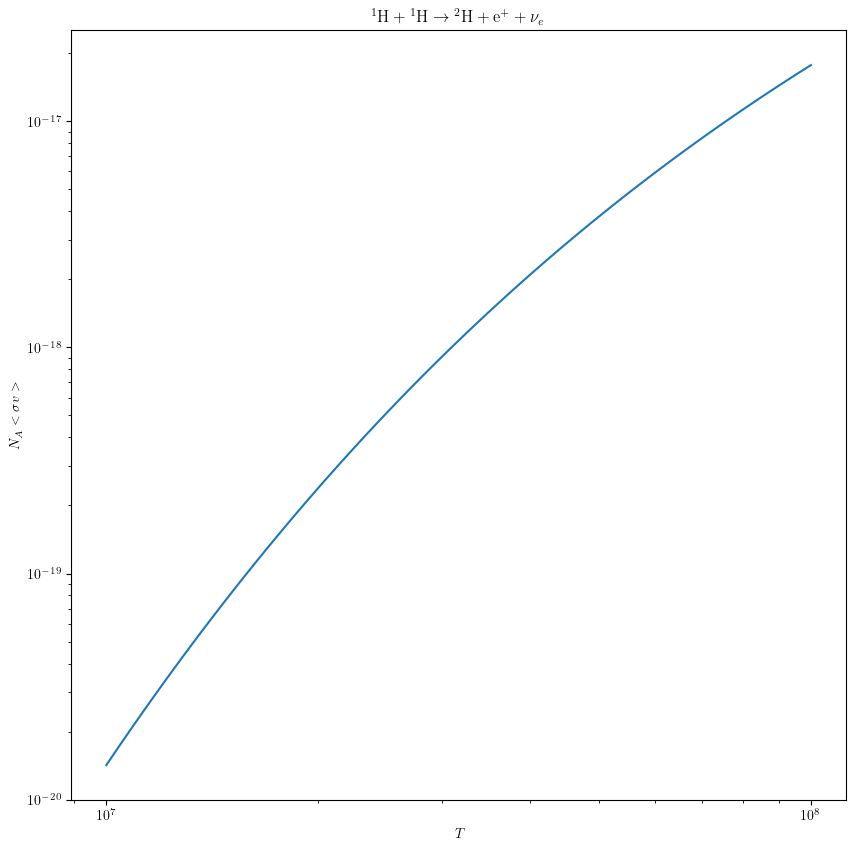

In [8]:
r = rates[0]
fig = r.plot(Tmin=1.e7, Tmax=1.e8)

In [9]:
net_pp = pyna.RateCollection(rates=rates)

In [10]:
T = 1.5e7
rho = 150
comp = pyna.Composition(net_pp.unique_nuclei)
comp.set_solar_like()

In [11]:
net_pp.evaluate_rates(rho, T, comp)

{p + p ⟶ H2 + e⁺ + 𝜈: 2.978374743269655e-18,
 p + p + e⁻ ⟶ H2 + 𝜈: 1.357778476769111e-20,
 H2 + p ⟶ He3 + 𝛾: 0.005874533290651895,
 He3 + He3 ⟶ p + p + He4: 1.849294558580789e-13}

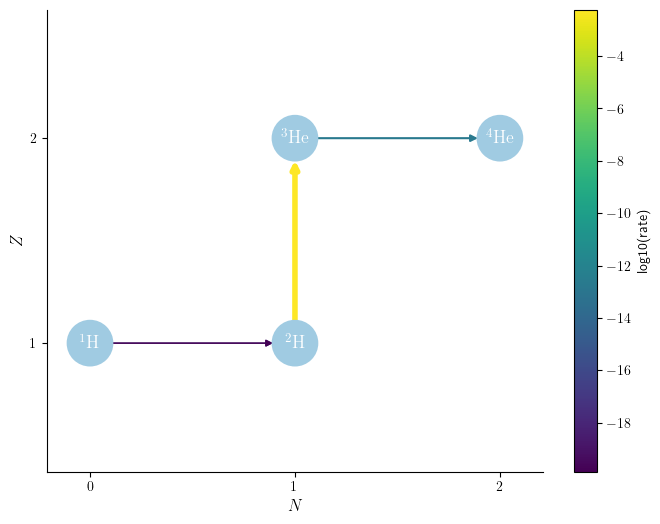

In [12]:
fig = net_pp.plot(rho=rho, T=T, comp=comp, hide_xp=True, always_show_alpha=True)

In [13]:
r_pp = net_pp.get_rate_by_name("p(p,)d")[0]
T0 = 1.5e7
r_pp.get_rate_exponent(T0)

3.9735120801889896

In [14]:
cno_rates = ["c12(p,g)n13",
             "c13(p,g)n14",
             "n13(,)c13",
             "n14(p,g)o15",
             "n15(p,a)c12",
             "o15(,)n15"]
rates = rl.get_rate_by_name(cno_rates)

In [15]:
for r in rates:
    print(r)

C12 + p ⟶ N13 + 𝛾
C13 + p ⟶ N14 + 𝛾
N13 ⟶ C13 + e⁺ + 𝜈
N14 + p ⟶ O15 + 𝛾
N15 + p ⟶ He4 + C12
O15 ⟶ N15 + e⁺ + 𝜈


In [16]:
net_cno = pyna.RateCollection(rates=rates)

In [17]:
comp = pyna.Composition(net_cno.unique_nuclei)
comp.set_solar_like()

In [18]:
net_cno.evaluate_rates(rho, T, comp)

{C12 + p ⟶ N13 + 𝛾: 1.0467759242295144e-17,
 C13 + p ⟶ N14 + 𝛾: 3.176211597339995e-17,
 N13 ⟶ C13 + e⁺ + 𝜈: 2.9720852738029567e-07,
 N14 + p ⟶ O15 + 𝛾: 1.7295781984662848e-20,
 N15 + p ⟶ He4 + C12: 6.954822248932605e-16,
 O15 ⟶ N15 + e⁺ + 𝜈: 1.2625681768893481e-06}

In [19]:
r_cno = net_cno.get_rate_by_name("n14(p,g)o15")

In [20]:
for T in [1.e7, 2.e7, 3.e7, 4.e7]:
    print(f"T = {T}, nu = {r_cno.get_rate_exponent(T):8.5f}")

T = 10000000.0, nu = 22.82962
T = 20000000.0, nu = 17.96637
T = 30000000.0, nu = 15.60186
T = 40000000.0, nu = 14.11535


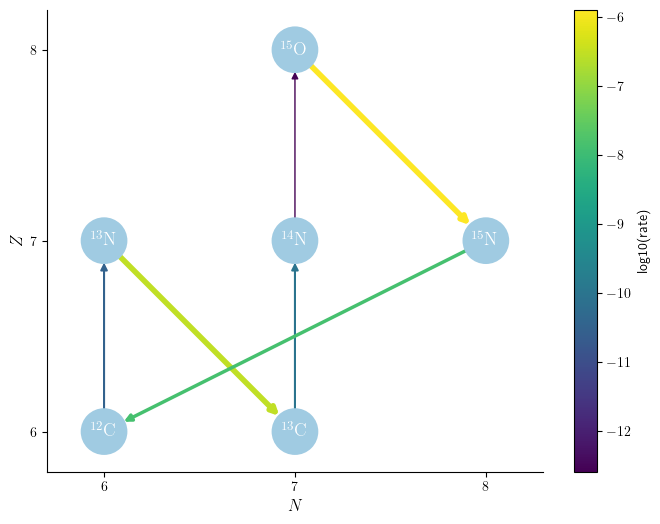

In [21]:
fig = net_cno.plot(rho=rho, T=T, comp=comp, hide_xp=True)

In [24]:
Ts = np.logspace(6.8, 8, 50)

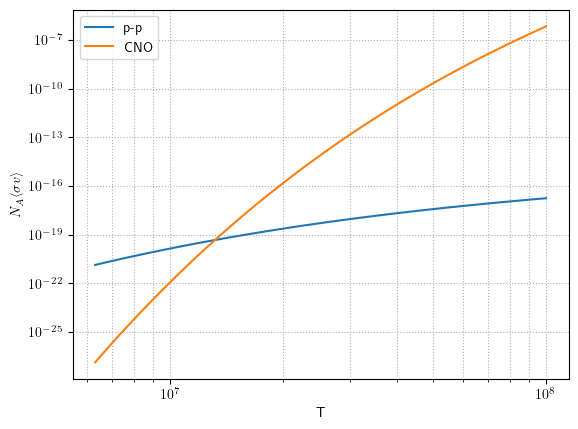

In [25]:
fig, ax = plt.subplots()

ax.loglog(Ts, [r_pp.eval(q) for q in Ts], label="p-p")
ax.loglog(Ts, [r_cno.eval(q) for q in Ts], label="CNO")
ax.set_xlabel("T")
ax.set_ylabel(r"$N_A\langle \sigma v \rangle$")
ax.grid(linestyle=":", which="both")
leg = ax.legend()

In [26]:
nuclei = pyna.get_all_nuclei()

In [27]:
len(nuclei)

3558

In [28]:
nuc_bound = max(nuclei, key=lambda n : n.nucbind)
nuc_bound

Ni62

In [29]:
As = [n.A for n in nuclei]
BEs = [n.nucbind for n in nuclei]

In [47]:
BEs

[0.0,
 1.1122831344998758,
 2.827265454666455,
 2.572680449333196,
 7.073915614499924,
 5.33233118199981,
 5.606440084571399,
 6.462669417333422,
 6.4750834819999,
 6.927732356363611,
 7.680144581999836,
 7.46984952184609,
 7.475614810571252,
 7.97620721324995,
 7.77901924610514,
 8.032241192000038,
 8.111493582782714,
 8.26071033199984,
 8.331553230814784,
 8.447744478428442,
 8.481167740645281,
 8.493130116374914,
 8.520278968228585,
 8.570281623999943,
 8.557025826051428,
 8.595259433800129,
 8.55130463200003,
 8.61894059431102,
 8.723012166833238,
 8.742085319058912,
 8.775994660307614,
 8.765024719999928,
 8.790356261857076,
 8.73206263434484,
 8.768037253017024,
 8.780776149866627,
 8.752140892952397,
 8.735905426874979,
 8.757097114707665,
 8.759633083636304,
 8.755682642941204,
 8.70122018652942,
 8.721702312114315,
 8.717604605408473,
 8.731745945111065,
 8.725201151999991,
 8.700874737493189,
 8.717807212512781,
 8.68759599544312,
 8.71081435970009,
 8.695947158518484,
 8.717

Text(0, 0.5, 'binding energy per nucleon')

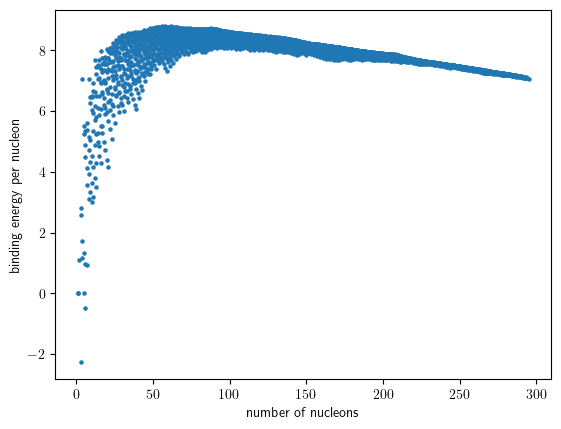

In [30]:
fig, ax = plt.subplots()
ax.scatter(As, BEs, s=5)
ax.set_xlabel("number of nucleons")
ax.set_ylabel("binding energy per nucleon")

In [31]:
nuc = ["H1", "H2", "H3", "He3", "He4",
       "Li6", "Li7", "Be9", "B10", "B11",
       "C12", "C13", "N14", "O16", "F19",
       "Ne20", "Na23", "Mg24", "Al27", "Si28",
       "P31", "S32", "Cl35", "Cl37", "K39",
       "Ar40", "Ca40", "Sc45", "Ti48", "V51",
       "Cr52", "Mn55", "Fe56", "Ni58", "Co59",
       "Ni60", "Cu63", "Zn64", "Cu65", "Zn66",
       "Zn68", "Ga68", "Ge70", "Ga71", "Ge72",
       "Ge74", "As75", "Se78", "Br79", "Se80",
       "Br81", "Kr84", "Rb85", "Sr88", "Zr90",
       "Nb93", "Zr94", "Mo95", "Mo96", "Mo98",
       "Tc98", "Ru102", "Rh103", "Pd105", "Pd106",
       "Ag107", "Pd108", "Ag109", "Cd112", "Cd114",
       "In115", "Sn118", "Sn120", "Sb121", "Sb123",
       "I127", "Te128", "Xe129", "Te130", "Xe131",
       "Xe132", "Cs133", "Ba138", "La139", "Ce140",
       "Pr141", "Nd142", "Pm145", "Eu151", "Sm152",
       "Eu153", "Sm154", "Gd156", "Gd158", "Dy162",
       "Dy163", "Dy164", "Ho165", "Er166", "Er167",
       "Er168", "Tm169", "Yb172", "Lu175", "Hf178",
       "Hf180", "Ta181", "W182", "W184", "Re185",
       "W186", "Re187", "Os190", "Ir191", "Os120",
       "Ir193", "Pt194", "Pt195", "Pt196", "Au197",
       "Hg200", "Hg202", "Tl203", "Tl205", "Pb206",
       "Pb208", "Bi209", "Po209", "At210", "Rn222",
       "Fr223", "Ra226", "Ac227", "Pa231", "Th232",
       "U235", "U238"]

new_nuc = [pyna.Nucleus(name) for name in nuc]

In [32]:
As = [n.A for n in new_nuc]
BEs = [n.nucbind for n in new_nuc]

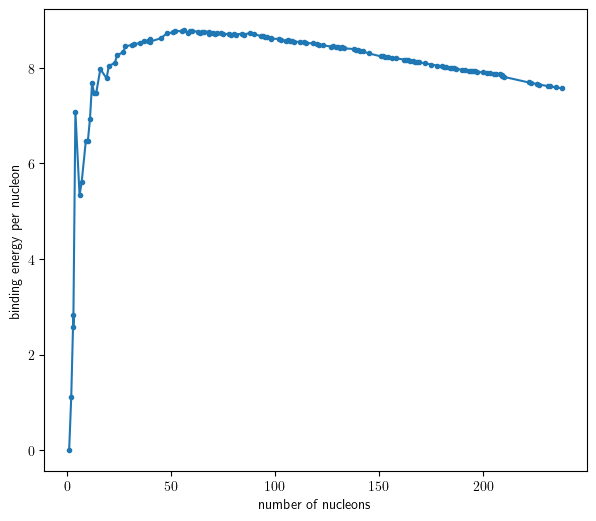

In [33]:
fig, ax = plt.subplots()
ax.plot(As, BEs, marker="o", markersize="3")
ax.set_xlabel("number of nucleons")
ax.set_ylabel("binding energy per nucleon")
fig.set_size_inches((7, 6))

In [34]:
max_Z = max(nuclei, key=lambda n : n.Z).Z
max_N = max(nuclei, key=lambda n : n.N).N

In [35]:
dm_mag = abs(max(nuclei, key=lambda n: abs(n.dm)).dm)
dm_mag

201.37

In [36]:
dm = np.zeros((max_Z+1, max_N+1))
be = np.zeros((max_Z+1, max_N+1))

In [37]:
dm[:,:] = np.nan
be[:,:] = np.nan

In [38]:
for n in nuclei:
    dm[n.Z, n.N] = n.dm
    be[n.Z, n.N] = n.nucbind

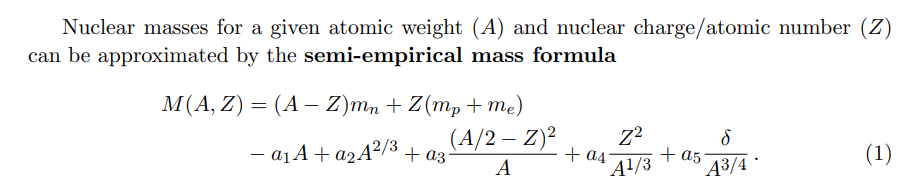

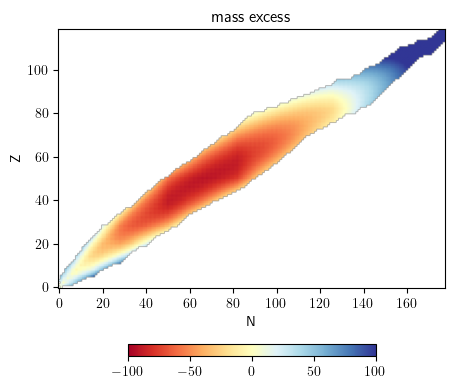

In [40]:
# mask out the regions with no nuclei
cmap = plt.colormaps['RdYlBu']
cmap.set_bad(color='white')

fig, ax = plt.subplots()
im = ax.imshow(dm, origin="lower", cmap="RdYlBu",
               vmin=-100, vmax=100)
ax.set_xlabel("N")
ax.set_ylabel("Z")
ax.set_title("mass excess")
fig.colorbar(im, ax=ax, location="bottom", shrink=0.5)

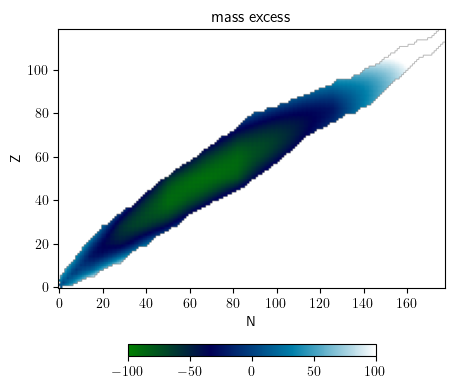

In [55]:
# mask out the regions with no nuclei
cmap = plt.colormaps['ocean']
cmap.set_bad(color='red')

fig, ax = plt.subplots()
im = ax.imshow(dm, origin="lower", cmap="ocean",
               vmin=-100, vmax=100)
ax.set_xlabel("N")
ax.set_ylabel("Z")
ax.set_title("mass excess")
fig.colorbar(im, ax=ax, location="bottom", shrink=0.5)

In [ ]:
https://www.researchgate.net/publication/333051333_Karlsruhe_Nuclide_Chart_-_New_10th_edition_2018

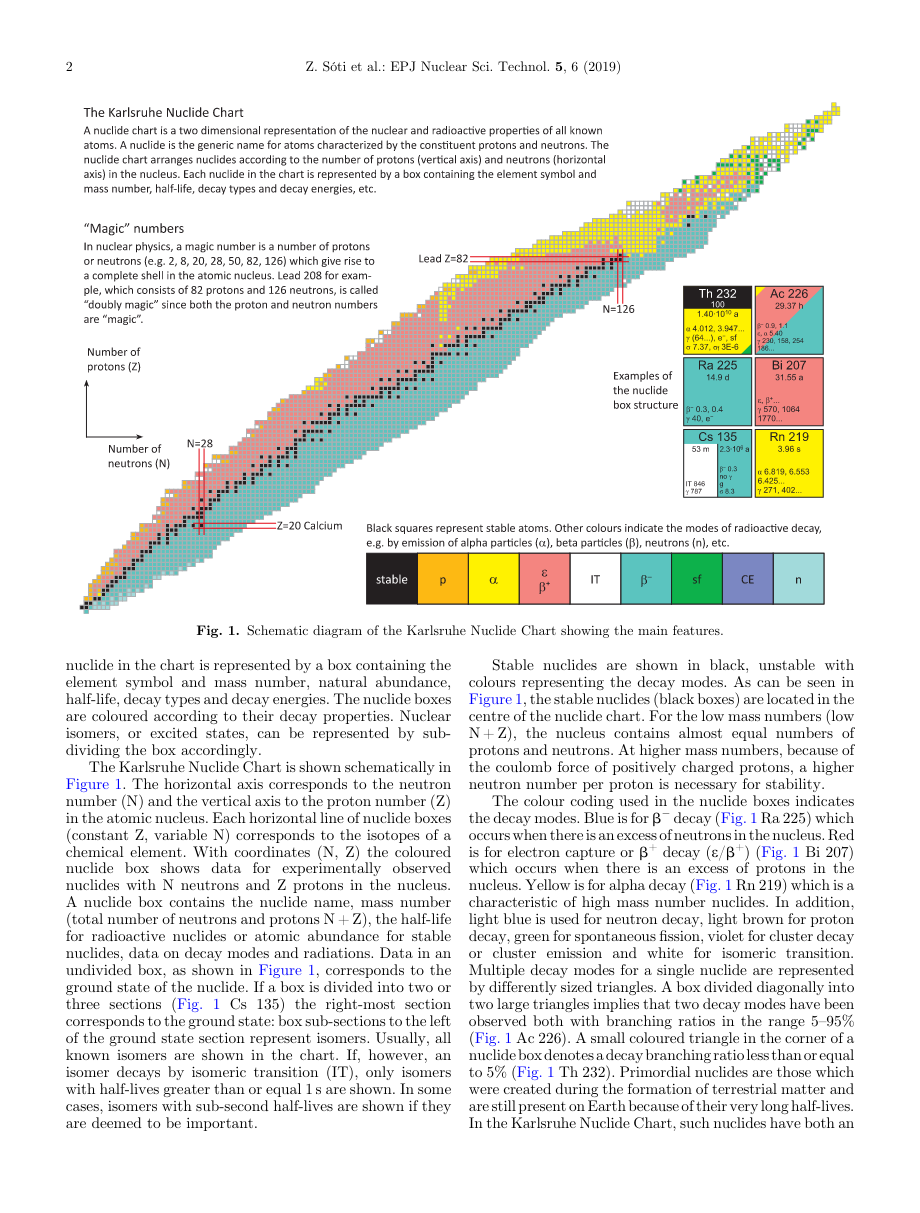

In [60]:
rl = pyna.ReacLibLibrary()


In [ ]:
https://www-nds.iaea.org/amdc/

In [81]:
df = parse_ame2020('/content/mass_1.mas20')

In [82]:
df

,N,Z,A,symbol,mass_excess
0,1,0,1,n,8071.31806
1,0,1,1,H,7288.97106
2,1,1,2,H,13135.72289
3,2,1,3,H,14949.81090
4,1,2,3,He,14931.21888
...,...,...,...,...,...
2545,157,108,265,Hs,120900.24500
2546,158,108,266,Hs,121139.67500
2547,157,109,266,Mt,127672.68100
2548,159,110,269,Ds,134834.67100


In [93]:
df['mass_excess'] = df['mass_excess'] / 1000.0  # Divide by 1000 to convert keV to MeV
df

,N,Z,A,symbol,mass_excess
0,1,0,1,n,8.071318
1,0,1,1,H,7.288971
2,1,1,2,H,13.135723
3,2,1,3,H,14.949811
4,1,2,3,He,14.931219
...,...,...,...,...,...
2545,157,108,265,Hs,120.900245
2546,158,108,266,Hs,121.139675
2547,157,109,266,Mt,127.672681
2548,159,110,269,Ds,134.834671


In [97]:
import plotly.express as px

# Create the 3D scatter plot with colorscale
fig = px.scatter_3d(df, x='N', y='Z', z='mass_excess',
                    hover_name='symbol',
                    color='mass_excess',  # Color points based on mass_excess
                    color_continuous_scale='Viridis',  # Choose a colorscale (e.g., Viridis)

                    )

# Add labels for specific elements
elements_to_label = ['Fe56', 'Ni58', 'U238']

for element in elements_to_label:
    element_data = df[df['symbol'] == element]
    if not element_data.empty:
        fig.add_annotation(
            x=element_data['N'].values[0],
            y=element_data['Z'].values[0],
            z=element_data['mass_excess'].values[0],
            text=element,
            showarrow=True,
            arrowhead=1,
            ax=20,
            ay=-40
        )
    else:
        print(f"Warning: Element '{element}' not found in dataframe.")

# Customize the plot
fig.update_layout(title='3D Scatter Plot of N, Z, and Mass Excess with Colorscale')
fig.show()

In [98]:
import plotly.graph_objects as go
from scipy.interpolate import griddata

num_points = 100  # Number of points in each dimension of the grid
xi = np.linspace(df['N'].min(), df['N'].max(), num_points)
yi = np.linspace(df['Z'].min(), df['Z'].max(), num_points)
X, Y = np.meshgrid(xi, yi)

# Interpolate mass_excess values onto the grid
Z = griddata((df['N'], df['Z']), df['mass_excess'], (X, Y), method='cubic')

# Create surface plot with contours
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y,
                                 colorscale='Viridis',
                                 contours_z=dict(show=True, usecolormap=True,
                                                 highlightcolor="limegreen", project_z=True))])

# Customize the plot
fig.update_layout(title='Surface Plot of N, Z, and Mass Excess with Contours',
                  scene=dict(xaxis_title='N', yaxis_title='Z', zaxis_title='Mass Excess (MeV)'))
fig.show()

In [85]:
import plotly.graph_objects as go

# Create the 3D scatter plot using go.Scatter3d
fig = go.Figure(data=[go.Scatter3d(
    x=df['N'],
    y=df['Z'],
    z=df['mass_excess']/,
    mode='markers',
    marker=dict(
        size=5,  # Adjust marker size as needed
        color=df['mass_excess'],  # Optionally color by mass_excess
        colorscale='Viridis',  # Choose a colorscale
        opacity=0.8  # Adjust opacity as needed
    )
)])

# Update layout for better visualization
fig.update_layout(scene=dict(
    xaxis_title='N',
    yaxis_title='Z',
    zaxis_title='mass_excess'
),
    width=700,
    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

In [90]:
import plotly.express as px

# Create the 3D scatter plot
fig = px.scatter_3d(df, x='N', y='Z', z='mass_excess',
                    hover_name='symbol',  # Show element name on hover
                    )

# Add labels for specific elements
elements_to_label = ['Fe56', 'Ni58', 'U238']  # Elements to label

for element in elements_to_label:
    element_data = df[df['symbol'] == element]
    fig.add_annotation(
        x=element_data['N'].values[0],
        y=element_data['Z'].values[0],
        z=element_data['mass_excess'].values[0],
        text=element,
        showarrow=True,
        arrowhead=1,
        ax=20,
        ay=-40  # Adjust arrow position as needed
    )


# Customize the plot (optional)
fig.update_layout(title='3D Scatter Plot of N, Z, and Mass Excess with Labels')
fig.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

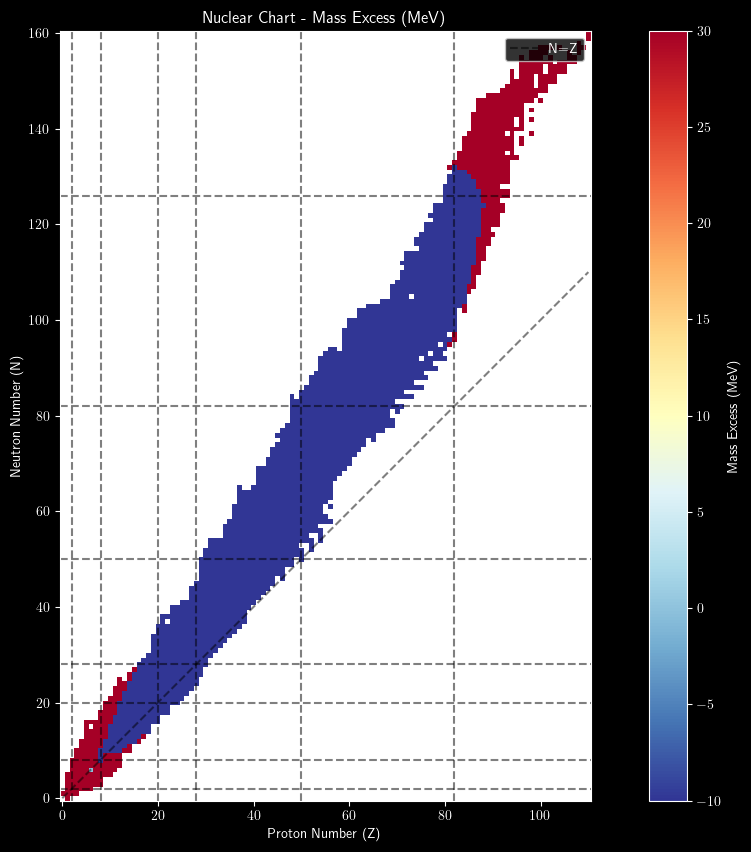

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def parse_ame2020(filename):
    """Parse AME2020 mass excess data file."""
    data = []
    with open(filename, 'r') as f:
        for line in f:
            if line[0] not in ['0', '1', ' ']:  # Skip header lines
                continue
            try:
                # Parse fixed-width format
                N = int(line[4:9].strip())
                Z = int(line[9:14].strip())
                A = N + Z
                symbol = line[20:23].strip()
                mass_excess = float(line[29:41].strip())
                # Store data
                data.append({
                    'N': N,
                    'Z': Z,
                    'A': A,
                    'symbol': symbol,
                    'mass_excess': mass_excess
                })
            except (ValueError, IndexError):
                continue

    return pd.DataFrame(data)

def plot_nuclear_chart(df):
    """Create a nuclear chart plot showing the island of stability."""
    # Create a grid for the plot
    Z_max = int(df['Z'].max()) + 1
    N_max = int(df['N'].max()) + 1

    # Initialize grid with NaN
    mass_excess_grid = np.full((N_max, Z_max), np.nan)

    # Fill the grid with mass excess values
    for _, row in df.iterrows():
        mass_excess_grid[int(row['N']), int(row['Z'])] = row['mass_excess']

    # Create the plot
    fig, ax = plt.subplots(figsize=(15, 10))

    # Create custom colormap
    cmap = plt.cm.RdYlBu_r
    cmap.set_bad('white')

    # Plot the mass excess
    im = ax.imshow(mass_excess_grid,
                   origin='lower',
                   aspect='equal',
                   cmap=cmap,
                   vmin=-10,
                   vmax=30)

    # Add magic numbers
    magic_numbers = [2, 8, 20, 28, 50, 82, 126]
    for n in magic_numbers:
        if n < N_max:
            ax.axhline(y=n, color='black', linestyle='--', alpha=0.5)
        if n < Z_max:
            ax.axvline(x=n, color='black', linestyle='--', alpha=0.5)

    # Customize the plot
    ax.set_xlabel('Proton Number (Z)')
    ax.set_ylabel('Neutron Number (N)')
    ax.set_title('Nuclear Chart - Mass Excess (MeV)')

    # Add colorbar
    cbar = plt.colorbar(im)
    cbar.set_label('Mass Excess (MeV)')

    # Add N=Z line
    z = np.arange(0, min(N_max, Z_max))
    ax.plot(z, z, 'k--', alpha=0.5, label='N=Z')

    # Add legend
    ax.legend()

    return fig, ax

# Usage
try:
    # Read and parse the data
    df = parse_ame2020('/content/mass_1.mas20')

    # Create the plot
    fig, ax = plot_nuclear_chart(df)

    plt.show()

except FileNotFoundError:
    print("Error: Could not find the mass.mas20 file.")
    print("Please ensure the file is in the current directory.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

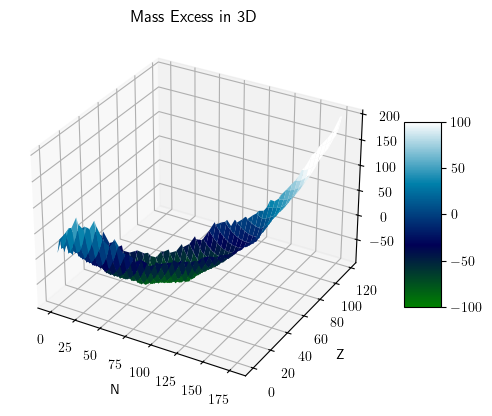

In [50]:
from mpl_toolkits.mplot3d import Axes3D
Z, N = np.indices(dm.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(N, Z, dm, cmap='', vmin=-100, vmax=100)

# Set axis labels and title
ax.set_xlabel("N")
ax.set_ylabel("Z")
ax.set_zlabel("mass excess")
ax.set_title("Mass Excess in 3D")

# Add a colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()

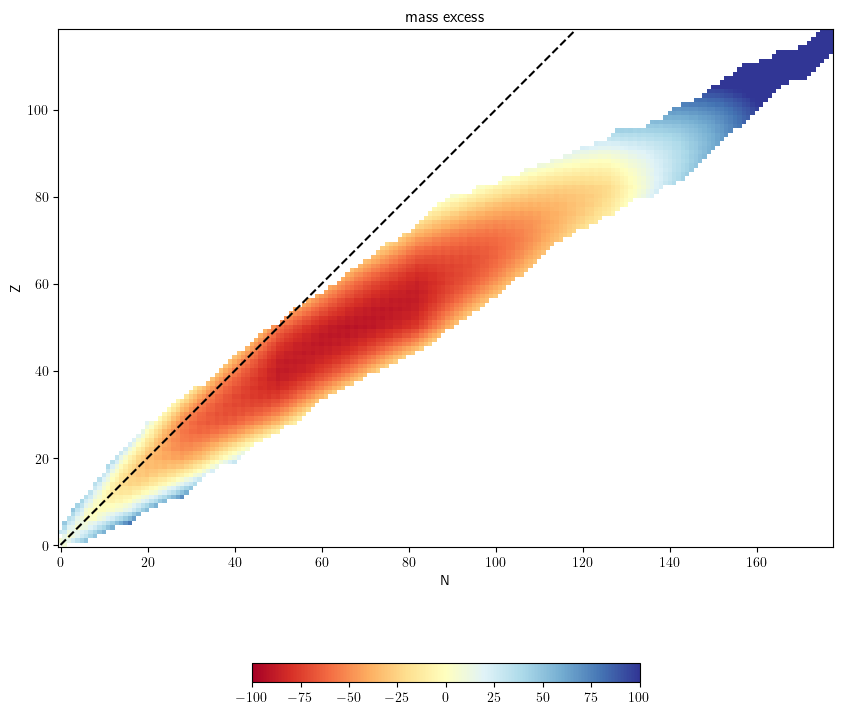

In [46]:
cmap = plt.colormaps['RdYlBu']
cmap.set_bad(color='white')

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(dm, origin="lower", cmap="RdYlBu",
               vmin=-100, vmax=100)
ax.set_xlabel("N")
ax.set_ylabel("Z")
ax.set_title("mass excess")
fig.colorbar(im, ax=ax, location="bottom", shrink=0.5)

# Assuming dm is a 2D numpy array
# Swap the dimensions to match Z (y-axis) and N (x-axis)
x_coords = np.arange(dm.shape[0])  # N should correspond to the x-axis
y_coords = np.arange(dm.shape[1])  # Z should correspond to the y-axis

# Limit the plot to the diagonal line, where Z=N
limit = min(dm.shape[0], dm.shape[1]) # Get the smaller dimension
x_coords = x_coords[:limit] # Trim both arrays to the smaller dimension
y_coords = y_coords[:limit] # Trim both arrays to the smaller dimension

ax.plot(x_coords, y_coords, color='black', linestyle='--') # Plot y=x
plt.show()

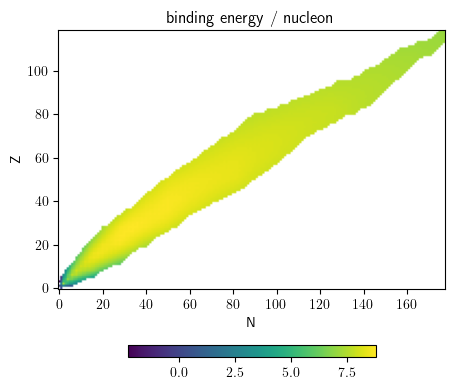

In [41]:
# mask out the regions with no nuclei
cmap = plt.colormaps['viridis']
cmap.set_bad(color='white')

fig, ax = plt.subplots()
im = ax.imshow(be, origin="lower", cmap=cmap)
ax.set_xlabel("N")
ax.set_ylabel("Z")
ax.set_title("binding energy / nucleon")
fig.colorbar(im, ax=ax, location="bottom", shrink=0.5)